In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm

In [4]:
df=pd.read_excel('COVID-19.xlsx')
df['Corona_result']=df['Corona_result'].replace([2],1)
df.head(10)

,age,pain_in_chest,body_temp,diabetes,sour_throat,weakness,breathing_problem,drowsiness,gender,travel_history_to_infected_countries,Dry_Cough,heart_disease,lung_disease,stroke_or_reduced_immunity,symptoms_progressed,high_blood_pressue,kidney_disease,change_in_appetide,Loss_of_sense_of_smell,Corona_result
0,20,1,98.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19,1,99.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,55,0,102.0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1
3,40,0,100.0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,1,0,1
4,33,1,99.2,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1
5,51,1,102.0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,1
6,80,0,101.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
7,52,0,98.8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
8,53,1,100.0,1,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1
9,54,0,102.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1


PREPROCESSING

In [5]:
df.isnull().values.any()

False

FEATURE SCALING

In [6]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))  
df['body_temp'] = min_max_scaler.fit_transform(df[['body_temp']]) 
df.head(10) 

,age,pain_in_chest,body_temp,diabetes,sour_throat,weakness,breathing_problem,drowsiness,gender,travel_history_to_infected_countries,Dry_Cough,heart_disease,lung_disease,stroke_or_reduced_immunity,symptoms_progressed,high_blood_pressue,kidney_disease,change_in_appetide,Loss_of_sense_of_smell,Corona_result
0,20,1,0.366197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19,1,0.422535,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,55,0,0.845070,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1
3,40,0,0.563380,0,0,0,0,1,1,1,1,0,0,0,1,1,0,1,0,1
4,33,1,0.450704,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1
5,51,1,0.845070,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,1
6,80,0,0.704225,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
7,52,0,0.394366,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
8,53,1,0.563380,1,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1
9,54,0,0.845070,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1


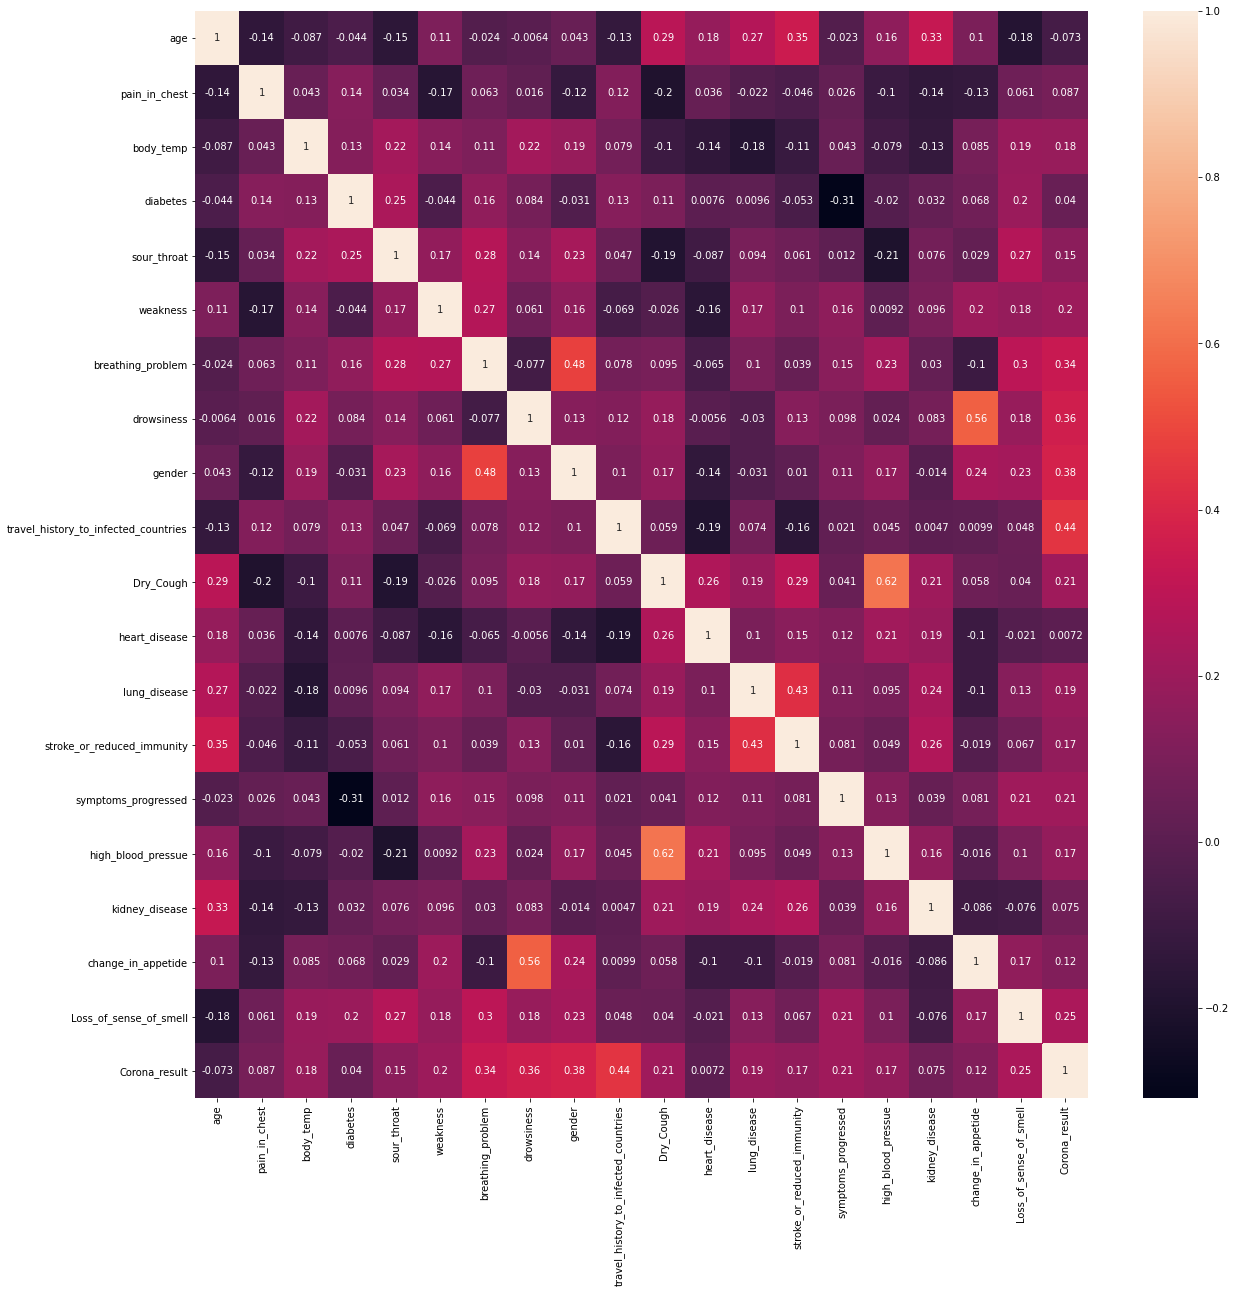

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
corrmatrix=df.corr()
sns.heatmap(corrmatrix,annot=True)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.show()

We see travel history, gender, breathing problem  shows a high positive correlation

SELECT K BEST

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X=df.iloc[:,:-1]
y=df['Corona_result']
ordered_rank_features=SelectKBest(score_func=chi2,k=19)
ordered_feature=ordered_rank_features.fit(X,y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,29.116810
1,pain_in_chest,3.604261
2,body_temp,2.943757
3,diabetes,0.826979
4,sour_throat,10.427337
5,weakness,24.301939
6,breathing_problem,65.290428
7,drowsiness,77.516345
8,gender,92.306076
9,travel_history_to_infected_countries,107.196276


WE SEE HERE THAT AGE, BREATING PROBLEM, TRAVEL HISTORY PLAY A MAJOR ROLE AND ARE THE TOP FEATURES TO DETERMINE COVID RESULT

In [9]:
#removing unnessary:
l=['pain_in_chest','diabetes','heart_disease','kidney_disease']
df.drop(l,axis=1, inplace=True)
df.head(10)

,age,body_temp,sour_throat,weakness,breathing_problem,drowsiness,gender,travel_history_to_infected_countries,Dry_Cough,lung_disease,stroke_or_reduced_immunity,symptoms_progressed,high_blood_pressue,change_in_appetide,Loss_of_sense_of_smell,Corona_result
0,20,0.366197,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19,0.422535,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,55,0.845070,1,1,1,1,1,0,0,0,0,0,0,1,0,1
3,40,0.563380,0,0,0,1,1,1,1,0,0,1,1,1,0,1
4,33,0.450704,1,0,1,0,0,1,0,1,1,1,0,0,1,1
5,51,0.845070,1,1,1,1,1,0,0,0,0,1,0,1,1,1
6,80,0.704225,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,52,0.394366,0,1,0,0,0,1,0,0,0,0,0,1,0,1
8,53,0.563380,1,0,0,1,0,0,1,0,1,0,0,0,0,1
9,54,0.845070,1,1,0,0,0,0,0,0,0,0,0,1,0,1


COMPARING ALGO:

In [11]:
#TRAIN TEST SPLIT
y=df['Corona_result']
df.drop(['Corona_result'],axis=1,inplace=True)
X=df
X.head()

,age,body_temp,sour_throat,weakness,breathing_problem,drowsiness,gender,travel_history_to_infected_countries,Dry_Cough,lung_disease,stroke_or_reduced_immunity,symptoms_progressed,high_blood_pressue,change_in_appetide,Loss_of_sense_of_smell
0,20,0.366197,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19,0.422535,0,0,0,0,0,0,0,0,0,0,0,0,0
2,55,0.845070,1,1,1,1,1,0,0,0,0,0,0,1,0
3,40,0.563380,0,0,0,1,1,1,1,0,0,1,1,1,0
4,33,0.450704,1,0,1,0,0,1,0,1,1,1,0,0,1


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=0)

LOGISTIC REGRESSION

In [13]:
from sklearn.linear_model import LogisticRegression as lr
classifier = lr()
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
#evaluation of model
pred =classifier.predict(X_test)
recall_lr = rs(Y_test,pred)
precision_lr = ps(Y_test,pred)
f1_lr = fs(Y_test,pred)
ma_lr = classifier.score(X_test,Y_test)

In [15]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_lr)
print('Precision Score: ',precision_lr)
print('F1 Score: ',f1_lr)
print('Accuracy: ',ma_lr)

*** Evaluation metrics for test dataset ***

Recall Score:  0.9770642201834863
Precision Score:  0.891213389121339
F1 Score:  0.9321663019693655
Accuracy:  0.898360655737705


SVM

In [16]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
pred =classifier.predict(X_test)
recall_svm = rs(Y_test,pred)
precision_svm = ps(Y_test,pred)
f1_svm = fs(Y_test,pred)
ma_svm = classifier.score(X_test,Y_test)
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_svm)
print('Precision Score: ',precision_svm)
print('F1 Score: ',f1_svm)
print('Accuracy: ',ma_svm)

*** Evaluation metrics for test dataset ***

Recall Score:  1.0
Precision Score:  0.7147540983606557
F1 Score:  0.8336520076481836
Accuracy:  0.7147540983606557


DECISION TREES

In [18]:
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(max_depth=2)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
pred =classifier.predict(X_test)
recall_dtc = rs(Y_test,pred)
precision_dtc = ps(Y_test,pred)
f1_dtc = fs(Y_test,pred)
ma_dtc = classifier.score(X_test,Y_test)

In [20]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_dtc)
print('Precision Score: ',precision_dtc)
print('F1 Score: ',f1_dtc)
print('Accuracy: ',ma_dtc)

*** Evaluation metrics for test dataset ***

Recall Score:  0.7844036697247706
Precision Score:  0.9193548387096774
F1 Score:  0.8465346534653465
Accuracy:  0.7967213114754098


ADABOOST

In [21]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=100)
classifier.fit(X_train, Y_train)
pred =classifier.predict(X_test)

In [22]:
recall_ada = rs(Y_test,pred)
precision_ada = ps(Y_test,pred)
f1_ada = fs(Y_test,pred)
ma_ada = classifier.score(X_test,Y_test)

In [23]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_ada)
print('Precision Score: ',precision_ada)
print('F1 Score: ',f1_ada)
print('Accuracy: ',ma_ada)

*** Evaluation metrics for test dataset ***

Recall Score:  0.981651376146789
Precision Score:  0.963963963963964
F1 Score:  0.9727272727272728
Accuracy:  0.9606557377049181


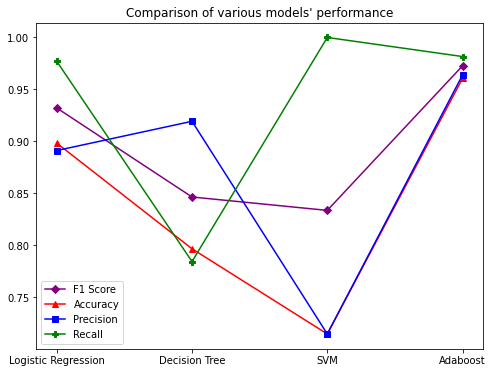

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
plt.plot(['Logistic Regression','Decision Tree','SVM','Adaboost'],[f1_lr,f1_dtc,f1_svm,f1_ada],color='purple',marker='D')
plt.plot(['Logistic Regression','Decision Tree','SVM','Adaboost'],[ma_lr,ma_dtc,ma_svm,ma_ada],color='red',marker='^')
plt.plot(['Logistic Regression','Decision Tree','SVM','Adaboost'],[precision_lr,precision_dtc,precision_svm,precision_ada],color='blue',marker='s')
plt.plot(['Logistic Regression','Decision Tree','SVM','Adaboost'],[recall_lr,recall_dtc,recall_svm,recall_ada],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))
plt.title('Comparison of various models\' performance')

plt.show(fig)

SO, WE SEE  ADABOOST SHOWs THE BEST METRICS. NOW, WE WILL COMBINE IT IN ENSEMBLE WITH RANDOM FORESTS FOR MAX ACCURACY

ENSEMBLE OF ADABOOST AND RANDOM FORESTS WITH HYPERPARAMETER TUNING

In [25]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [26]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [27]:
from sklearn.model_selection import RandomizedSearchCV
rf_Model = RandomForestClassifier()
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [28]:
rf_RandomGrid.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   10.1s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [29]:
rf_RandomGrid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 40}

In [30]:
rf_Model = RandomForestClassifier(n_estimators=80,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features='auto',
 max_depth= 4,
 bootstrap= True)

In [31]:
classifier = AdaBoostClassifier(rf_Model,n_estimators=100)
classifier.fit(X_train, Y_train)
pred =classifier.predict(X_test)


In [32]:
recall_boos = rs(Y_test,pred)
precision_boos = ps(Y_test,pred)
f1_boos = fs(Y_test,pred)
ma_boos = classifier.score(X_test,Y_test)

In [33]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_boos)
print('Precision Score: ',precision_boos)
print('F1 Score: ',f1_boos)
print('Accuracy: ',ma_boos)

*** Evaluation metrics for test dataset ***

Recall Score:  0.981651376146789
Precision Score:  0.9683257918552036
F1 Score:  0.9749430523917995
Accuracy:  0.9639344262295082


SO HERE WE SEE A SIGNIFICANT INCREASE IN ACCURACY